# Exploratory Data Analysis

## New York Time Articles - Word Clouds

### Goal of this notebook

> Grasp the corpus contextual contents for directing feature engineering of the Text Classifier.

### Word Clouds

To get a better grasp of great volumes of text, plotting Word Clouds comes in as very handy in a more qualitative matter. That's what we do here.

> The larger* words indicate trending topics such as Politics and Health (due to coronavirus, pandemic and Presient Trump keywords, for example).

\* The larger the word the higher their frequency in the text.

Import libraries.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from textblob import TextBlob
import matplotlib.pyplot as plt
from src.paths import LOCAL_INTERIM_DATA_PATH
from src.processing.IOController import load_normalized_nyt_df
from src.processing.DataFrameManipulator import breakdown_cat_distribution
from src.visualization.Plotter import show_wordcloud, plot_nyt_word_incidence
tqdm.pandas()

Load dataset.

In [419]:
df = load_normalized_nyt_df(LOCAL_INTERIM_DATA_PATH / 'nyt-articles-consolidated.csv')

Before diving into the segmentations, let's have a look on the whole corpora!

> Trump and Coronavirus are indeed top subjects across the last 18 months as expected. No major insights here...

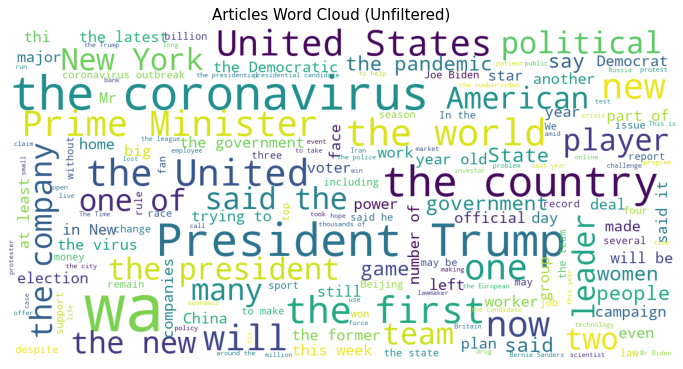

In [367]:
show_wordcloud(' '.join(df.abstract.dropna().tolist()), title='Articles Word Cloud (Unfiltered)')

Below a quick and dirty implementation of several Word Cloud taking the first 4 desks.

> Apart from getting a contextual idea of the corpus, such as that Prime Ministers and China are in the minds of NYT journalists when it comes to Foreign matters, it's possible to check that the word dictionary for each group is in fact different which is an indication of signal in the data for a good Text Classifier. A next level approach would be tokenizing the data into n-grams (pairs for 2, 3, 4, until n words) to draw more contextual insights from the data. 

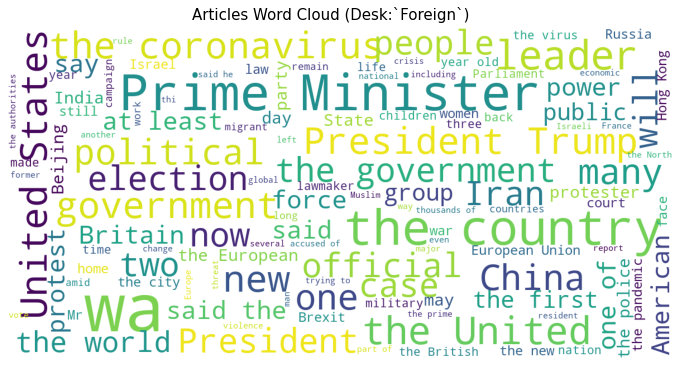

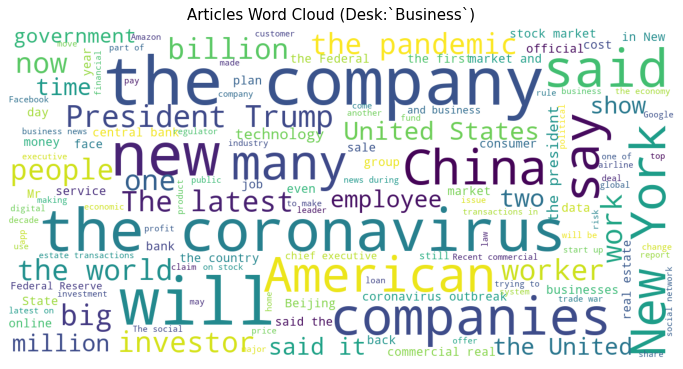

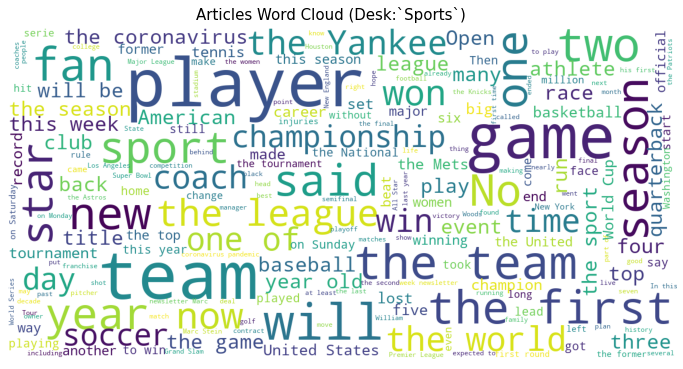

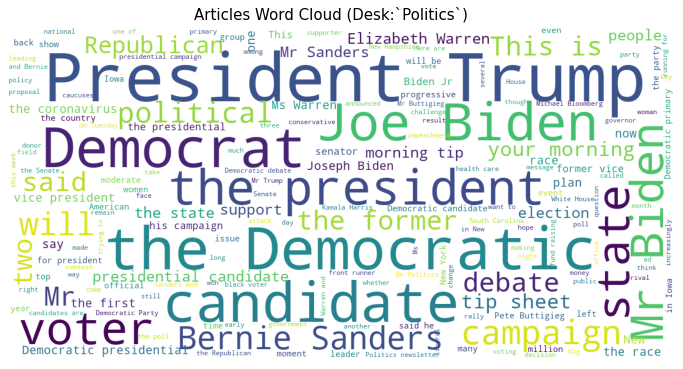

In [371]:
for i in range(4):
    desk = df['news_desk'].value_counts().index[i]
    mask = df['news_desk'] == desk
    show_wordcloud(' '.join(df[mask].abstract.dropna().tolist()), title=f'Articles Word Cloud (Desk:`{desk}`)')

A fast lookup of `abstract` with keywords Prime Minister
> When it comes to text it always boils down into making the Machine reproduce the contextual understanding of text situations. That's why it's crucial to always validate the data in a as many points when possible. This will save time in the future for dealing with error types. Below we can check what is said about Prime Ministers, which gives a better grasp. Less obvious situations can be checked with a good outcome as well.

In [376]:
df[df.abstract.str.contains('Prime Minister', na=False)].abstract

168      Prime Minister Benjamin Netanyahu has promised...
439      The failure of Prime Minister Abiy Ahmed’s gov...
670      Elizabeth, sequestered at Windsor Castle, offe...
696      Citing the coronavirus pandemic, Mr. Gantz, wh...
950      Prime Minister Benjamin Netanyahu demanded an ...
                               ...                        
20835    A slump in exports raises questions about how ...
20862    One party in Prime Minister Netanyahu’s coalit...
20989    President Trump’s audience with Prime Minister...
20990    In the wake of the terrorist attack on Muslim ...
21023    Prime Minister Viktor Orban’s government has c...
Name: abstract, Length: 240, dtype: object

Checking this keywords overtime can also help validating the models in the future, and even draw quick insights before more complex models get even built.

> Below we can check the mentions about virus, and it's trend. It's amazing how it comes to a peak April/2020 covering 25% of the articles. Ouch! Plus it is still amazes me how such a simple RegEx (Regular Expression) brings such a big win in terms of effort vs. drawn insight ratio.

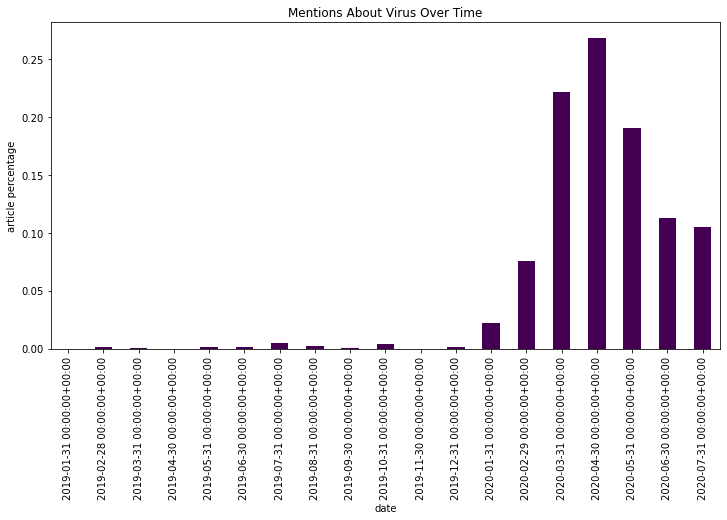

In [416]:
plot_nyt_word_incidence(df=df, lookup_word='virus')

Now moving into politics let's check how many mentions there's for the republicans...

> Trump is always a beloved subject for the NYT as it seems... haha!

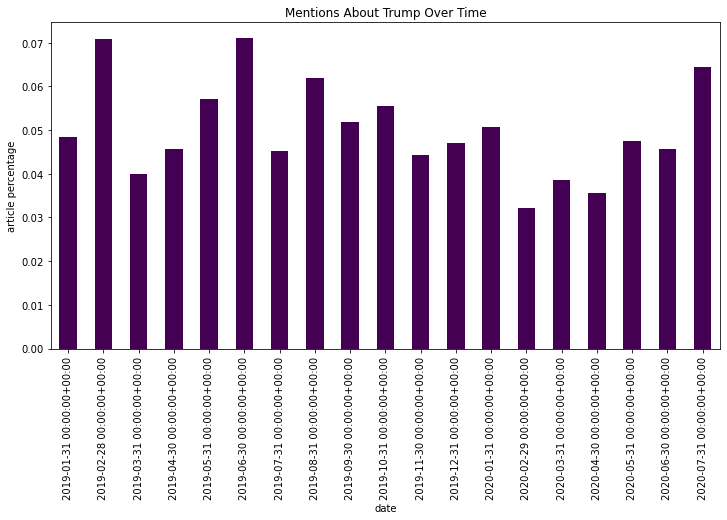

In [417]:
plot_nyt_word_incidence(df=df, lookup_word='Trump')

And what about the Democrats?

> Biden becomes more popular as the elections are almost knocking the door...

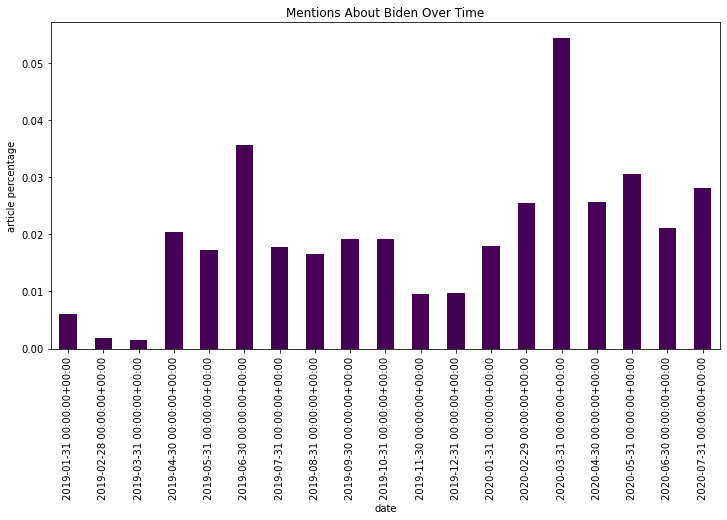

In [418]:
plot_nyt_word_incidence(df=df, lookup_word='Biden')

### Conclusion

> There are some trends and characteristcs of the dataset which lead to a promising outcome with a Text Classifier. The labels present (desks) do seem to have different word dictionaries which may produce positive results. Additionally, some subjects such as coronavirus and the elections seem to be increasingly present on the news for NYT which is also observable broadly on the press.